In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math as m

In [14]:
data_csv = "retail_sales_dataset.csv"
df = pd.read_csv(data_csv)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


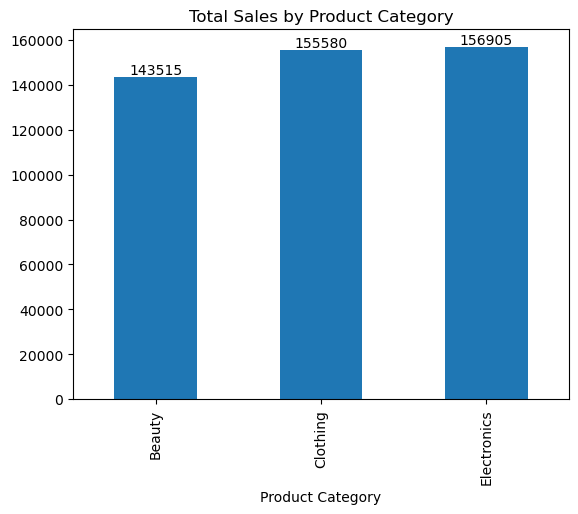

In [16]:
product_category_total_sales = df.groupby("Product Category")["Total Amount"].sum()
ax = product_category_total_sales.plot(kind="bar", x="Product Category", y="Total Sales")
ax.bar_label(ax.containers[0])
plt.title("Total Sales by Product Category")
plt.show()

#### Remark:

The distribution is relatively uniform, implying that the demand for these products among the store customers is equal across the categories of electronics, clothing, and beauty. Although it is relatively uniform in distribution it is still notable that electronics is their most sought product category of the customers, while the beauty category comparing it with the rest of the product categories is their least sought product category by thier costumers.

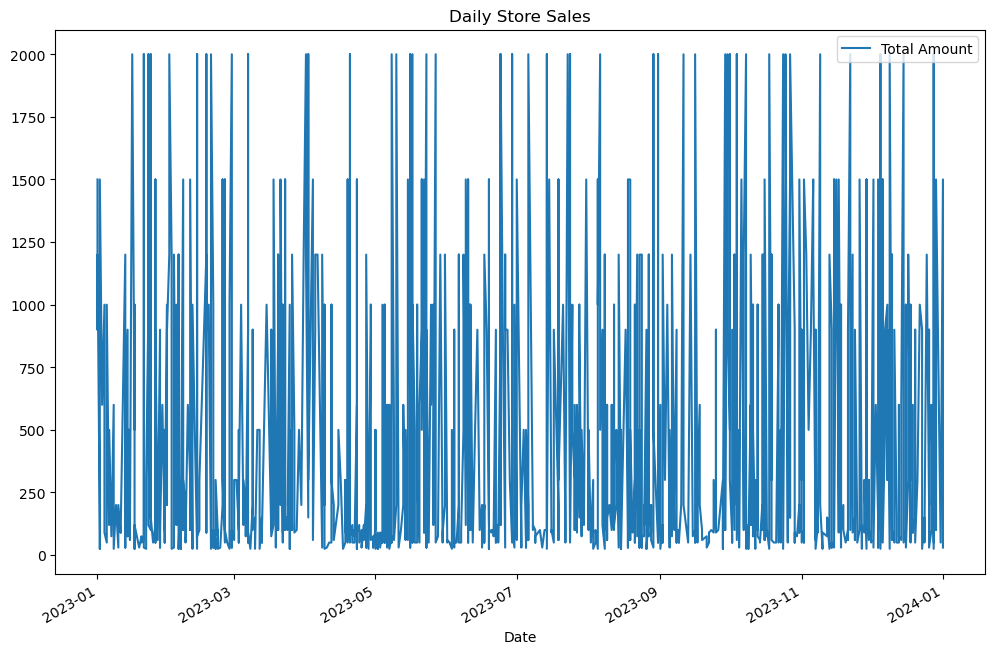

In [24]:
dfDateIndex = df.set_index('Date')
dfDateIndex.plot(y="Total Amount",title="Daily Store Sales",figsize=(12,8));

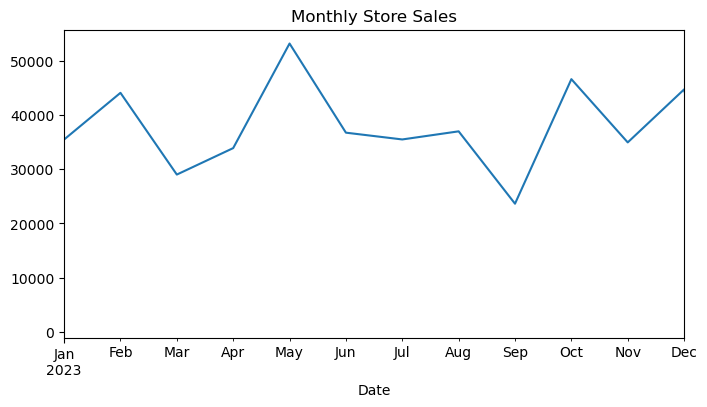

In [46]:
dfDateIndex["Total Amount"].resample("M").sum().plot(y="Total Amount",title="Monthly Total Store Sales",figsize=(8,4), xlim=["01-01-2023","12-31-2023"]);

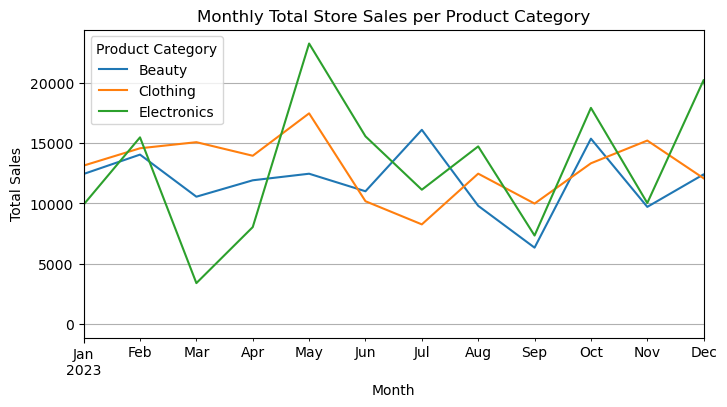

In [50]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby(['Month', 'Product Category'])['Total Amount'].sum().unstack()

monthly_sales.plot(title="Monthly Total Store Sales per Product Category", figsize=(8, 4))

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.legend(title="Product Category")
plt.xlim(["2023-01", "2023-12"])
plt.show()

#### Remark:
The first figure shows the total sales of the products wherein we can observe that there seems to be a relationship between the time and the sales, wherein during January we can see an increase in sales which might be caused by an event for instance New Year's. Assuming that this data is collated from the Philippines many families buy many different new items to represent the phrase "New Year, New Me". October and December have a similar situation in that the sales may be derived from events/occasions for instance gifts for Christmas or decorations, treats, and costumes during Halloween. We can also see a slight peak in February where we can add these sales to Valentine's Day for giving gifts to your loved ones. 

In the second figure, we can see the three categories of data throughout 2023. For the category beauty, we can see that as discussed earlier during February the increase in sales could be attributed to Valentine's Day. We can also see that during summer there is an increase which can be attributed to vacations and traveling. For the category of clothing, we can see that seasonality has an effect on sales of that category wherein for instance from fall to winter there is an increase in sales which may indicate gifts for their loved ones for Christmas, or it could indicate that there is a renewal of old clothes. The most intriguing data here would be for electronics wherein there is a large drop in demand in March where we can investigate for more clues that might be the case. After that big drop, we can observe a huge leap in sales in may be indicative of a new school year.

Not just demand is what we can derive from this chart but also how we could time our pricing, marketing, and supply of our stocks for greater returns and minimizing the loss of the company on costs. For instance, we can see that instead of having equal amounts of supply for each category of products we can set a more optimized number by looking at the demand due to the seasonality of the sales data, thus reducing the expenditure of the business.

In [56]:
df.groupby("Customer ID")["Total Amount"].sum().describe()

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: Total Amount, dtype: float64

In [63]:
df.groupby("Customer ID")["Total Amount"].sum()

Customer ID
CUST001     150
CUST002    1000
CUST003      30
CUST004     500
CUST005     100
           ... 
CUST995      30
CUST996      50
CUST997      90
CUST998     100
CUST999     150
Name: Total Amount, Length: 1000, dtype: int64

<Axes: >

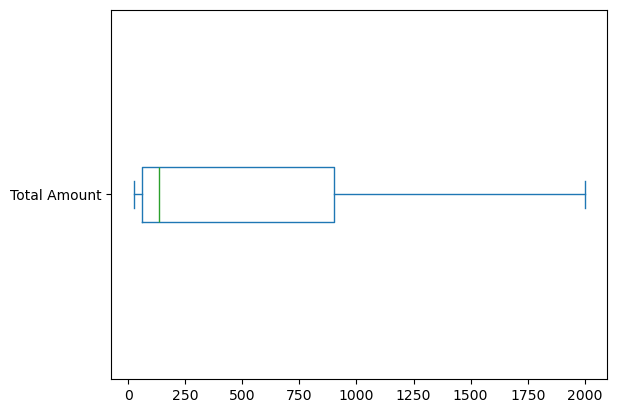

In [59]:
df.groupby("Customer ID")["Total Amount"].sum().plot(kind="box", vert=False)

#### Remark:
We can derive some kind of segmentation using our interquartile ranges and our mean. Where our customers can be categorized by the following:

- Low Spender: minimum - 50% (25$\leq$x$\leq$135)
- Medium-low Spender: 50% - mean (135<x$\leq$456)
- Medium-high Spender: mean - 75% (456<x$\leq$900)
- High Spender: 75% - above (900< x)

With the boxplot above we can determine the distribution of our data wherein we can say that the majority of our customers are from our inter-quartile range, while the extreme values are special cases. By segmenting our customers it tells us the economic standing of our main demographic of our customers wherein the majority spend as much as 900. This indicates to our marketing team the audience we need to cater to and it would tell the managers how to strategize the pricing of our products wherein it would benefit both the business and increase the interests of the customers.

In [69]:
data_csv = "school_performance.csv"
df = pd.read_csv(data_csv)
df.tail()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4
144,STUDENT145,1,1,1,5,2,2,2,3,1,...,2,1,3,2,3,1,5,4,9,3


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

In [67]:
df["COURSE ID"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [68]:
df["STUDENT ID"].unique()

array(['STUDENT1', 'STUDENT2', 'STUDENT3', 'STUDENT4', 'STUDENT5',
       'STUDENT6', 'STUDENT7', 'STUDENT8', 'STUDENT9', 'STUDENT10',
       'STUDENT11', 'STUDENT12', 'STUDENT13', 'STUDENT14', 'STUDENT15',
       'STUDENT16', 'STUDENT17', 'STUDENT18', 'STUDENT19', 'STUDENT20',
       'STUDENT21', 'STUDENT22', 'STUDENT23', 'STUDENT24', 'STUDENT25',
       'STUDENT26', 'STUDENT27', 'STUDENT28', 'STUDENT29', 'STUDENT30',
       'STUDENT31', 'STUDENT32', 'STUDENT33', 'STUDENT34', 'STUDENT35',
       'STUDENT36', 'STUDENT37', 'STUDENT38', 'STUDENT39', 'STUDENT40',
       'STUDENT41', 'STUDENT42', 'STUDENT43', 'STUDENT44', 'STUDENT45',
       'STUDENT46', 'STUDENT47', 'STUDENT48', 'STUDENT49', 'STUDENT50',
       'STUDENT51', 'STUDENT52', 'STUDENT53', 'STUDENT54', 'STUDENT55',
       'STUDENT56', 'STUDENT57', 'STUDENT58', 'STUDENT59', 'STUDENT60',
       'STUDENT61', 'STUDENT62', 'STUDENT63', 'STUDENT64', 'STUDENT65',
       'STUDENT66', 'STUDENT67', 'STUDENT68', 'STUDENT69', 'STUDENT70',
 

In [80]:
studentGradePerCourse=df.groupby("STUDENT ID")["GRADE"].mean()
studentGradePerCourse

STUDENT ID
STUDENT1      1.0
STUDENT10     0.0
STUDENT100    7.0
STUDENT101    6.0
STUDENT102    7.0
             ... 
STUDENT95     6.0
STUDENT96     5.0
STUDENT97     7.0
STUDENT98     6.0
STUDENT99     7.0
Name: GRADE, Length: 145, dtype: float64

In [78]:
meanScorePerCourse=df.groupby("COURSE ID")["GRADE"].mean()
meanScorePerCourse.describe()

count    9.000000
mean     4.106061
std      1.919243
min      1.357143
25%      2.287879
50%      4.500000
75%      5.875000
max      6.333333
Name: GRADE, dtype: float64

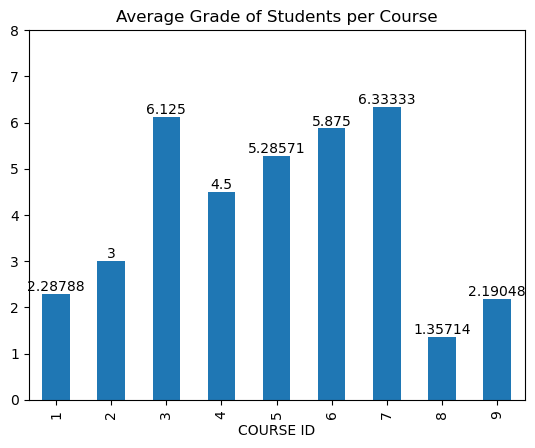

In [86]:
ax = meanScorePerCourse.plot(kind="bar", x="COURSE ID", y="GRADE")
ax.bar_label(ax.containers[0])
ax.set_ylim(0, 8)
plt.title("Average Grade of Students per Course")
plt.show()

#### Remark:
Given by the average scores of students for each course serve as a reference to alarm the university's personnel to develop more investigative and specific measures for identifying key deficiencies, for instance course material, faculty, student life, etc.

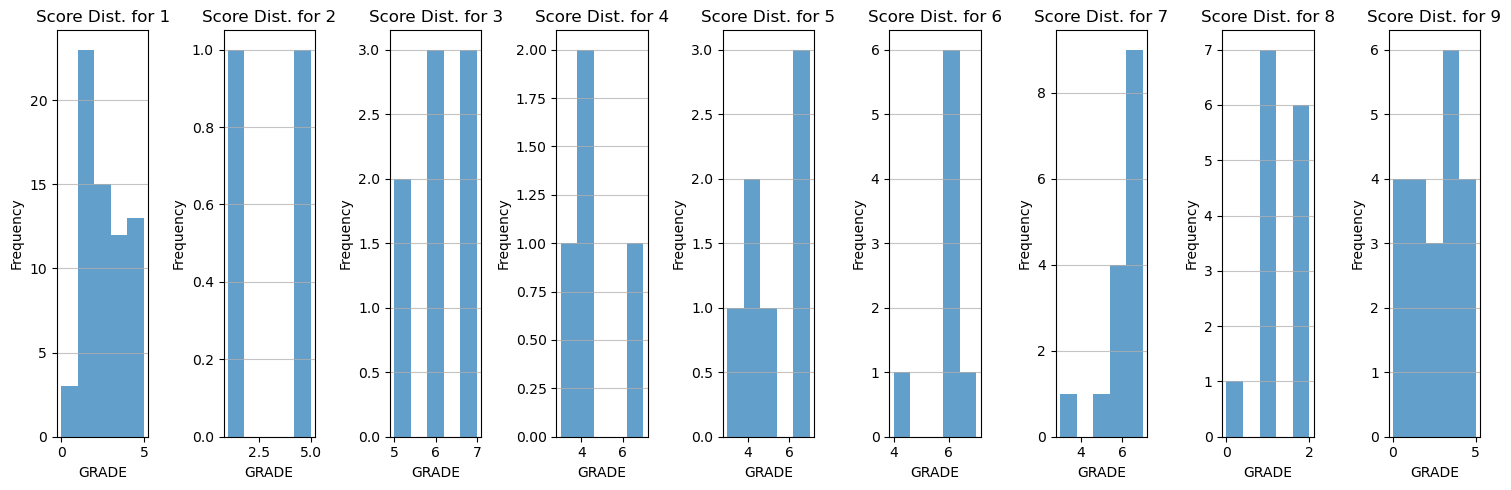

In [96]:
courses = df.groupby('COURSE ID')

num_courses = len(courses)
fig, axes = plt.subplots(nrows=1, ncols=num_courses, figsize=(15, 5)) 

for ax, (course, group) in zip(axes, grouped):
    ax.hist(group['GRADE'], bins=5, alpha=0.7)
    ax.set_title(f'Score Dist. for {course}')
    ax.set_xlabel('GRADE')
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

#### Remark:
This given by the charts tell us that some courses have students who can keep up with the corresponding topics and lessons however there are also those courses that exist very skewed positively and negatively. Which indicates that these students does not have the sufficient proficiency on the course itself, wherein interventions like tutoring or peer to peer sessions are required.

In [104]:
for student in list(df[df["GRADE"] <= 4.5]["STUDENT ID"]):
    print(f"{student}", end=', ')

STUDENT1, STUDENT2, STUDENT3, STUDENT4, STUDENT5, STUDENT6, STUDENT8, STUDENT10, STUDENT11, STUDENT12, STUDENT13, STUDENT14, STUDENT15, STUDENT16, STUDENT17, STUDENT18, STUDENT19, STUDENT20, STUDENT21, STUDENT22, STUDENT23, STUDENT24, STUDENT25, STUDENT26, STUDENT27, STUDENT28, STUDENT29, STUDENT32, STUDENT33, STUDENT34, STUDENT35, STUDENT36, STUDENT37, STUDENT38, STUDENT39, STUDENT40, STUDENT41, STUDENT42, STUDENT43, STUDENT44, STUDENT45, STUDENT46, STUDENT48, STUDENT49, STUDENT50, STUDENT51, STUDENT52, STUDENT53, STUDENT55, STUDENT56, STUDENT58, STUDENT59, STUDENT61, STUDENT63, STUDENT65, STUDENT66, STUDENT68, STUDENT77, STUDENT79, STUDENT80, STUDENT81, STUDENT82, STUDENT86, STUDENT94, STUDENT105, STUDENT111, STUDENT112, STUDENT113, STUDENT114, STUDENT115, STUDENT116, STUDENT117, STUDENT118, STUDENT119, STUDENT120, STUDENT121, STUDENT122, STUDENT123, STUDENT124, STUDENT125, STUDENT126, STUDENT127, STUDENT128, STUDENT129, STUDENT130, STUDENT131, STUDENT132, STUDENT133, STUDENT134, STU

#### Remark:
The university should employ a bridging course that would address deficiencies of the students in terms of the lessons taught within their courses.

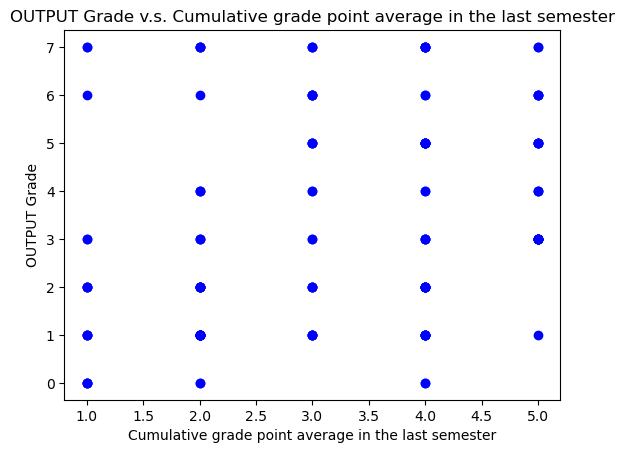

In [108]:
plt.scatter(df["29"],df["GRADE"], color='blue', marker='o')
plt.title('OUTPUT Grade v.s. Cumulative grade point average in the last semester')
plt.xlabel('Cumulative grade point average in the last semester')
plt.ylabel('OUTPUT Grade')

plt.show()